# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Section 1: The Gini is well-suited for categorical targets because it directly measures how mixed the classes are in a node using only class probabilities. Interpreted as a probability, it equals the chance that two items drawn at random from the node have different labels. It is zero only when the node is all one class and is largest when classes are evenly split, so minimizing Gini aligns with the goal of classification which is creater more homogenous groups. Gini provides a smooth, sensitive signal for choosing splits: such as small changes in class proportions change the loss unlike raw misclassficiation error which can miss helpful splits. It is also computationally cheap, symmetric across classes and works naturally for multi-class problems which makes it an efficient anf effectice loss for tree-based classifiers on categorical targets.

Section 2: Decision trees overfit because they keep splitting until each region is tiny, so they start modeling noise and outliers rather than the underlying pattern, which is a classic statistical mistake. The greedy split process repeatedly searches many cut points and variables so by chance it can find impurity drops that do not generalize. Deep trees with very small leaves have high variance with small changes in the data can flip splits and predictions, and exis aligned partitions can memorize idiosyncrasies of the training set. We can constrain this by limited complexity such as by capping tree depth or require a minimum number of samples to split or per leaf, limit the number of leaf nodes and/or require a minumum impurity decrease to split.

Section 3: False. Trees perform well with both categorical and numeric features. They handle thresholds on numeric variables, subsets of levels on categoricals, capture non-linearities and interactions, need no scaling, and cope with missing values. They can overfit as single trees, especially with many rare categorical levels, so use pruning or ensembles. When the true signal is very smooth and linear, regularized linear models may do better, but trees are not limited to “lots of categoricals” cases.

Section 4: Most tree algorithms use binary splits because they are simpler, faster, and generalize better. Searching all multiway splits explodes the search space, while a single binary threshold is easy to scan and compare across features. Multiway splits also fragment the data into many small child nodes, which raises variance and overfitting. Binary trees avoid this bias toward high-cardinality features and keep more samples per node. And you lose no real power which means any multiway partition can be built with a short sequence of binary splits often with better regularization and easier pruning.

Section 5: A quick check for fit: compare training and validation error with very low train error with much worse validation suggests overfitting, while both high and similar suggests underfitting. Inspect the tree: very deep with many tiny, near-pure leaves points to overfit very shallow with few broad, impure leaves points to underfit. Look for unstable structure across cross-validation folds versus consistently mediocre performance. Confusion matrices or residual plots that repeat the same mistakes hint at underfit. If it looks overfit, prune or raise limits if underfit allow more depth or features and relax those limits.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [ ]:
#Elected to do Question 3

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [3]:
import pandas as pd
#mostly simple have done this on most HWs
df = pd.read_csv("corporate_ratings.csv")
n_rows, n_cols = df.shape
print(f"Observations (rows): {n_rows}")
print(f"Variables (columns): {n_cols}")
df.head(5)  # show first few rows

Observations (rows): 2029
Variables (columns): 31


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


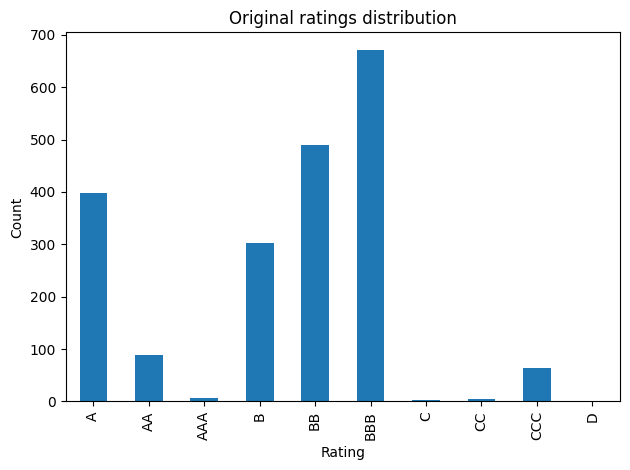

rating_simple
A     494
B    1463
C      71
D       1
Name: count, dtype: int64


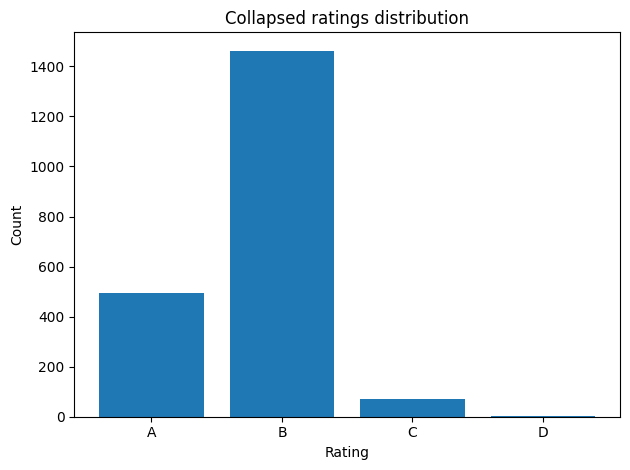

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv("corporate_ratings.csv") #ik this has already been done but like to repeat for own organization
def collapse(r):
    r = str(r).upper()
    if r.startswith("A"): return "A"
    if r.startswith("B"): return "B"
    if r.startswith("C"): return "C"
    return r  # keep D or others
#pre-collapse histogram, almost missedin Q prompt
ax = df["Rating"].value_counts().sort_index().plot(kind="bar")
ax.set_title("Original ratings distribution")
ax.set_xlabel("Rating"); ax.set_ylabel("Count")
plt.tight_layout(); plt.show()

df["rating_simple"] = df["Rating"].map(collapse)

counts = df["rating_simple"].value_counts().sort_index()
print(counts)

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Collapsed ratings distribution")
plt.xlabel("Rating"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

In [6]:
drop_cols = ["Rating", "Date", "Name", "Symbol", "Rating Agency Name"]
X = pd.get_dummies(df.drop(columns=drop_cols), columns=["Sector"])  #used AI to check answer

print(X.shape)   # rows, features
X.head()         # preview


(2029, 38)


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


Accuracy: 0.722
    A    B  C
A  59   64  0
B  59  307  0
C   0   18  0


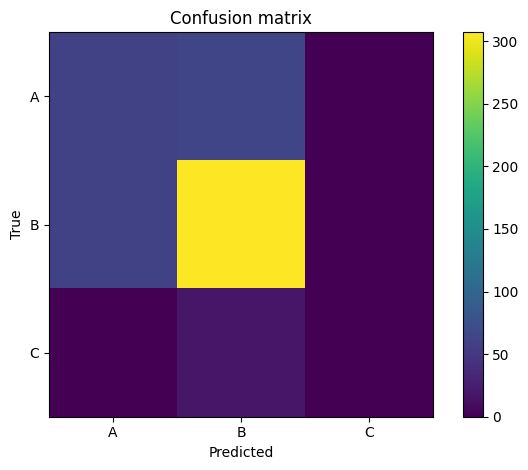

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# target: collapsed A/B/C (D is too rare for stratified split)
def collapse(r):
    r = str(r).upper()
    if r.startswith("A"): return "A"
    if r.startswith("B"): return "B"
    if r.startswith("C"): return "C"
    return r  # D/other

df = pd.read_csv("corporate_ratings.csv")
y = df["Rating"].map(collapse)

drop_cols = ["Rating", "Date", "Name", "Symbol", "Rating Agency Name"]
X = pd.get_dummies(df.drop(columns=drop_cols), columns=["Sector"])

mask = y != "D"              # drop the single D
X, y = X[mask], y[mask]

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf.fit(X_tr, y_tr)

y_pr = clf.predict(X_te)    #Used AI help when I got stuck
acc = accuracy_score(y_te, y_pr)
labels = ["A","B","C"]
cm = confusion_matrix(y_te, y_pr, labels=labels)
print(f"Accuracy: {acc:.3f}")
print(pd.DataFrame(cm, index=labels, columns=labels))  # rows=true, cols=pred

# quick visualization
plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
plt.title("Confusion matrix")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.colorbar(); plt.tight_layout(); plt.show()

#Explanation for non-coding part ---------------------------
#With min_samples_leaf set to 20, accuracy is around 0.72 on a 25% test split. The confusion matrix shows the model predicts B well but struggles with C, often assigning those to B.
#This reflects class imbalance; better C performance would likely need tuning.


In [10]:
# Alot of this is copy/pasted from my part 4 answers
df = pd.read_csv("corporate_ratings.csv")
def collapse(r):
    r = str(r).upper()
    if r.startswith("A"): return "A"
    if r.startswith("B"): return "B"
    if r.startswith("C"): return "C"
    return r  # D/other

y = df["Rating"].map(collapse)

# --- Main Change from part 4 -------------------------------------------------------
drop_cols = ["Rating", "Date", "Name", "Symbol"]  # do NOT drop "Rating Agency Name"
X = pd.get_dummies(df.drop(columns=drop_cols), columns=["Sector", "Rating Agency Name"])
#-------------------------------------------------------------------------------------
mask = y != "D"
X, y = X[mask], y[mask]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42).fit(X_tr, y_tr)
y_pr = clf.predict(X_te)

print(f"Accuracy: {accuracy_score(y_te, y_pr):.3f}")
print(pd.DataFrame(confusion_matrix(y_te, y_pr, labels=['A','B','C']),
                   index=['A','B','C'], columns=['A','B','C']))

Accuracy: 0.767
    A    B  C
A  72   51  0
B  49  317  0
C   0   18  0


The Explantion Section of Part 5:
Adding the rating agency helps because the person who rated it carries signal. Agencies use different scales and cutoffs, so the same fundamentals can map to different letters. In my run, accuracy rose from ~0.72 to ~0.77 after the change. Use this only if your goal is to predict the published label with all available info but if you want a fundamentals-only model, report both and prefer the version without agency. Also note the data are imbalanced (few C, essentially no D), so most of the gain is separating A vs B rather than fixing rare classes. Most of the lift appears in better A vs B separation; C remains limited due to scarce support.